In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Scikit-learn nos ofrece una variedad ampliada de modelos Naive Bayes, para este problema usamos MultinomialNB que es pensado para este tipo de problemas
from sklearn.naive_bayes import MultinomialNB   

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# TP3: Detector de SPAM

Uno de los problemas más comunes en la clasificación es la detección de correos electrónicos SPAM. Uno de los primeros modelos utilizados para abordar este problema fue el clasificador de Bayes ingenuo. La detección de SPAM es un problema persistente en el mundo digital, ya que los spammers continúan adaptando sus estrategias para eludir los filtros de correo no deseado. Además del clasificador de Bayes ingenuo, se han desarrollado y utilizado una variedad de técnicas más avanzadas en la detección de SPAM, que incluyen algoritmos de aprendizaje automático, redes neuronales y métodos basados en reglas.

En este trabajo práctico, utilizaremos un conjunto de datos que consta de 4601 observaciones de correos electrónicos, de los cuales 2788 son correos legítimos y 1813 son correos SPAM. Dado que el contenido de los correos electrónicos es un tipo de dato no estructurado, es necesario procesarlo de alguna manera. Para este conjunto de datos, ya se ha aplicado un procesamiento típico en el Procesamiento del Lenguaje Natural (NLP), que consiste en contar la frecuencia de palabras observadas en los correos.

El procesamiento de lenguaje natural (NLP) desempeña un papel fundamental en la detección de SPAM, ya que permite analizar el contenido de los correos electrónicos y extraer características relevantes para la clasificación. Además de contar la frecuencia de palabras, se pueden utilizar técnicas más sofisticadas, como la extracción de características semánticas y el análisis de sentimientos, para mejorar la precisión de los modelos de detección de SPAM.

En este proceso, se cuenta la cantidad de ocurrencias de cada palabra en los diferentes correos.

![spam counter](./spam.png)

Con el fin de preservar la privacidad de los mensajes, la frecuencia de palabras se encuentra normalizada. El conjunto de datos está compuesto por 54 columnas de atributos que se denominan:

- `word_freq_XXXX`: Donde `XXXX` es la palabra o símbolo. Los valores son enteros que van de 0 a 20k.

Además, hay una columna adicional llamada `spam`, que es 1 si el correo es SPAM o 0 si no lo es.

Los clasificadores de Bayes ingenuos fueron los primeros filtros utilizados por las aplicaciones de correo electrónico, basados en este principio de palabras. La idea es que, partiendo de un dato a priori sobre la probabilidad de que un correo sea SPAM o no, ciertas palabras nos indicarán que la probabilidad a posteriori, dadas esas palabras, es más probable que el correo sea SPAM o no.

Resolvio: Ing. Andres Chaparro

In [2]:
dataset = pd.read_csv("dataset/spambase.csv") # cargando los datos desde un CSV
dataset.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1
5,0,0,0,0,1850,0,0,1850,0,0,...,0,0,0,0,223,0,0,0,0,1
6,0,0,0,0,1920,0,0,0,0,640,...,0,0,0,0,54,0,164,54,0,1
7,0,0,0,0,1880,0,0,1880,0,0,...,0,0,0,0,206,0,0,0,0,1
8,150,0,460,0,610,0,300,0,920,760,...,0,0,0,0,271,0,181,203,22,1
9,60,120,770,0,190,320,380,0,60,0,...,0,0,0,40,30,0,244,81,0,1


Para obtener las palábras más usadas podemos hacer un `groupby`:

In [3]:
column_sum = dataset.groupby(by="spam", as_index=False).sum()
column_sum.head()

,spam,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#
0,0,204860,681569,559220,2470,504739,124190,26160,107100,106080,...,1159138,800669,22840,142820,140182,442116,63242,306634,32475,60536
1,1,276190,298510,732080,298550,931799,317050,499309,377360,308320,...,226790,26700,2210,3810,37299,197563,14864,931352,316328,143003


Y despues se pueden combinar las columnas en usando [pd.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

1. ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?

In [4]:
melted = pd.melt(column_sum, id_vars=["spam"], var_name="palabra", value_name="ocurrencia")

spam_melted = melted[melted["spam"] == 1]
no_spam_melted = melted[melted["spam"] == 0]

spam_melted = spam_melted.sort_values(by="ocurrencia", ascending=False)
no_spam_melted = no_spam_melted.sort_values(by="ocurrencia", ascending=False)

spam_top_10_columns = spam_melted.iloc[:10]
no_spam_top_10_columns = no_spam_melted.iloc[:10]

print(f"Las 10 palabras mas encontradas en correos con spam son:")
print(spam_top_10_columns)
print(f"Las 10 palabras mas encontradas en correos sin spam son:")
print(no_spam_top_10_columns)

Las 10 palabras mas encontradas en correos con spam son:
     spam             palabra  ocurrencia
37      1       word_freq_you     4105599
41      1      word_freq_your     2502597
23      1      word_freq_will      997100
31      1      word_freq_free      939790
9       1       word_freq_our      931799
103     1         char_freq_!      931352
5       1       word_freq_all      732080
19      1      word_freq_mail      635470
35      1     word_freq_email      578759
33      1  word_freq_business      521250
Las 10 palabras mas encontradas en correos sin spam son:
    spam            palabra  ocurrencia
36     0      word_freq_you     3541702
52     0   word_freq_george     3527559
48     0       word_freq_hp     2496576
22     0     word_freq_will     1495268
40     0     word_freq_your     1223098
50     0      word_freq_hpl     1204398
88     0       word_freq_re     1159138
90     0      word_freq_edu      800669
2      0  word_freq_address      681569
82     0  word_freq_meet

2. Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).

In [5]:
# Obtenemos los atributos y target
X = (dataset.drop(columns="spam") * 100).astype(int)
#X = dataset2.drop(columns="spam")
y = dataset["spam"]

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3)

3. Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.

In [7]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

4. Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, 
normalice los datos).

In [8]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Lo transformamos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_scaled, y_train)

LogisticRegression()

5. Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?

In [9]:
y_pred_test_nb = nb_classifier.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_test_nb)

In [10]:
y_pred_test_logistic = logistic_classifier.predict(X_test)
cm_logistic = confusion_matrix(y_test, y_pred_test_logistic)

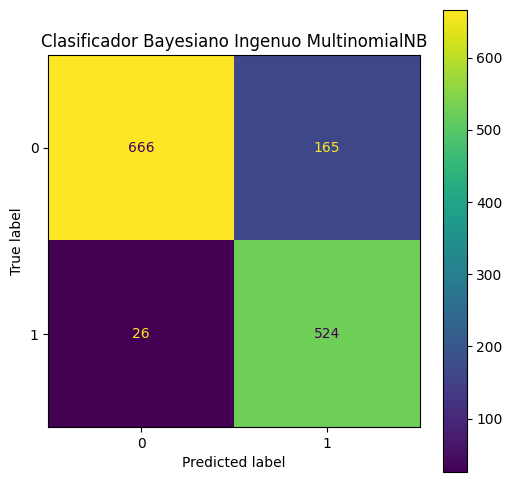

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_classifier.classes_)
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Bayesiano Ingenuo MultinomialNB");

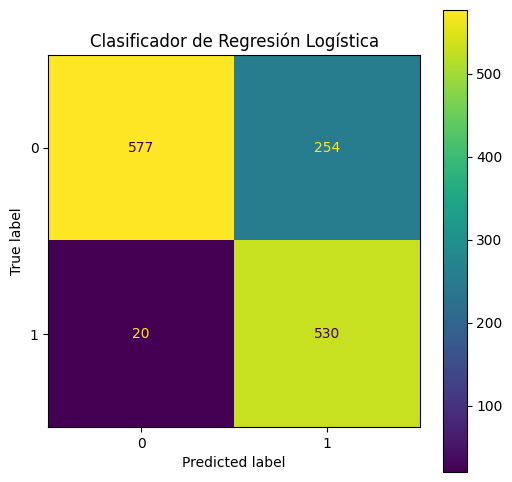

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=logistic_classifier.classes_)
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador de Regresión Logística");

El Clasificador Bayesiano Ingenuo predice 175 correos como spam cuando no lo son (falso positivo) y 26 correos como no spam cuando si lo son (falso negativo).
El Clasificador de Regresión Logística predice 265 correos como spam cuando no lo son (falso positivo) y 22 correos como no spam cuando si lo son (falso negativo).
El error mas importante es falso positivo, porque son correos que deberiamos recibir y se descartaron.

6. Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.

In [13]:
precision_nb = precision_score(y_test, y_pred_test_nb, zero_division=0)
precision_logistic = precision_score(y_test, y_pred_test_logistic, zero_division=0)
print(f"Precisión del Clasificador Bayesiano Ingenuo MultinomialNB: {precision_nb}")
print(f"Precisión del Clasificador de Regresión Logística: {precision_logistic}")

Precisión del Clasificador Bayesiano Ingenuo MultinomialNB: 0.760522496371553
Precisión del Clasificador de Regresión Logística: 0.6760204081632653


In [14]:
recall_nb = recall_score(y_test, y_pred_test_nb, zero_division=0)
recall_logistic = recall_score(y_test, y_pred_test_logistic, zero_division=0)
print(f"Recuperación del Clasificador Bayesiano Ingenuo MultinomialNB: {recall_nb}")
print(f"Recuperación del Clasificador de Regresión Logística: {recall_logistic}")

Recuperación del Clasificador Bayesiano Ingenuo MultinomialNB: 0.9527272727272728
Recuperación del Clasificador de Regresión Logística: 0.9636363636363636


La presición es:

Verdaderos Positivos / (Verdareros Positivos + Falsos Positivos)

Por ello, la presición del Clasificador Bayesiano Ingenuo MultinomialNB es mejor porque es menor el numero de falsos positivos (175 vs 265).

La recuperación es:

Verdaderos Positivos / (Verdareros Positivos + Falsos Negativos)

Por ello, la recuperacion del Clasificador de Regresión Logística es levemente mejor porque es menor el numero de falsos negativos (22 vs 26).

El mejor modelo es el Clasificador Bayesiano Ingenuo MultinomialNB, ya que es mas importante la metrica de presición. Porque, queremos que nuestro clasificador diga que es SPAM, si esta realmente seguro, para que el usuario no pierda correos electrónicos importantes.

7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

In [15]:
from sklearn.metrics import auc, roc_curve

In [16]:
y_prob_nb = nb_classifier.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

In [17]:
y_prob_logistic = logistic_classifier.predict_proba(X_test)[:, 1]
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

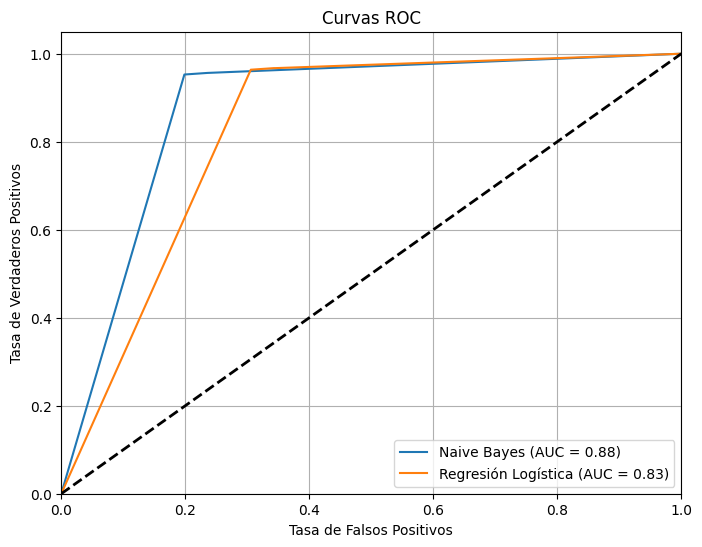

In [18]:
# Graficar las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_nb:.2f})")
plt.plot(fpr_logistic, tpr_logistic, label=f"Regresión Logística (AUC = {roc_auc_logistic:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curvas ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()